In [16]:
import pandas as pd
import pickle as pkl
import networkx as nx
import numpy as np
from networkx.algorithms import bipartite
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm
from multiprocessing import Pool

## Building a graph

In [17]:
with open ('data/drug_target_interactions.pkl', 'rb') as f:
    drug_target_interactions = pkl.load(f)

In [49]:
drug_target_interactions.head()

,drug_cas,drug_id,drug_name,target_actions,target_amino,target_gene,target_id,target_name,target_organism
0,138068-37-8,DB00001,Lepirudin,[inhibitor],>lcl|BSEQ0016004|Prothrombin\nMAHVRGLQLPGCLALA...,>lcl|BSEQ0016005|Prothrombin (F2)\nATGGCGCACGT...,BE0000048,Prothrombin,Human
1,205923-56-4,DB00002,Cetuximab,[antagonist],>lcl|BSEQ0001530|Epidermal growth factor recep...,>lcl|BSEQ0019007|Epidermal growth factor recep...,BE0000767,Epidermal growth factor receptor,Human
2,205923-56-4,DB00002,Cetuximab,NaN,>lcl|BSEQ0010635|Low affinity immunoglobulin g...,>lcl|BSEQ0010636|Low affinity immunoglobulin g...,BE0000901,Low affinity immunoglobulin gamma Fc region re...,Human
3,205923-56-4,DB00002,Cetuximab,NaN,>lcl|BSEQ0011518|Complement C1r subcomponent\n...,>lcl|BSEQ0011519|Complement C1r subcomponent (...,BE0002093,Complement C1r subcomponent,Human
4,205923-56-4,DB00002,Cetuximab,NaN,>lcl|BSEQ0016678|Complement C1q subcomponent s...,>lcl|BSEQ0016679|Complement C1q subcomponent s...,BE0002094,Complement C1q subcomponent subunit A,Human


In [19]:
drug_target_interactions_graph = nx.from_pandas_edgelist(drug_target_interactions[['drug_id', 'target_id']],
                                                         source = 'drug_id', target = 'target_id',
                                                         edge_attr = True)

In [20]:
drug_target_interactions_graph

In [21]:
nx.is_connected(drug_target_interactions_graph)

False

## Seems like the graph is not fully connected. Inspecting smaller connected components

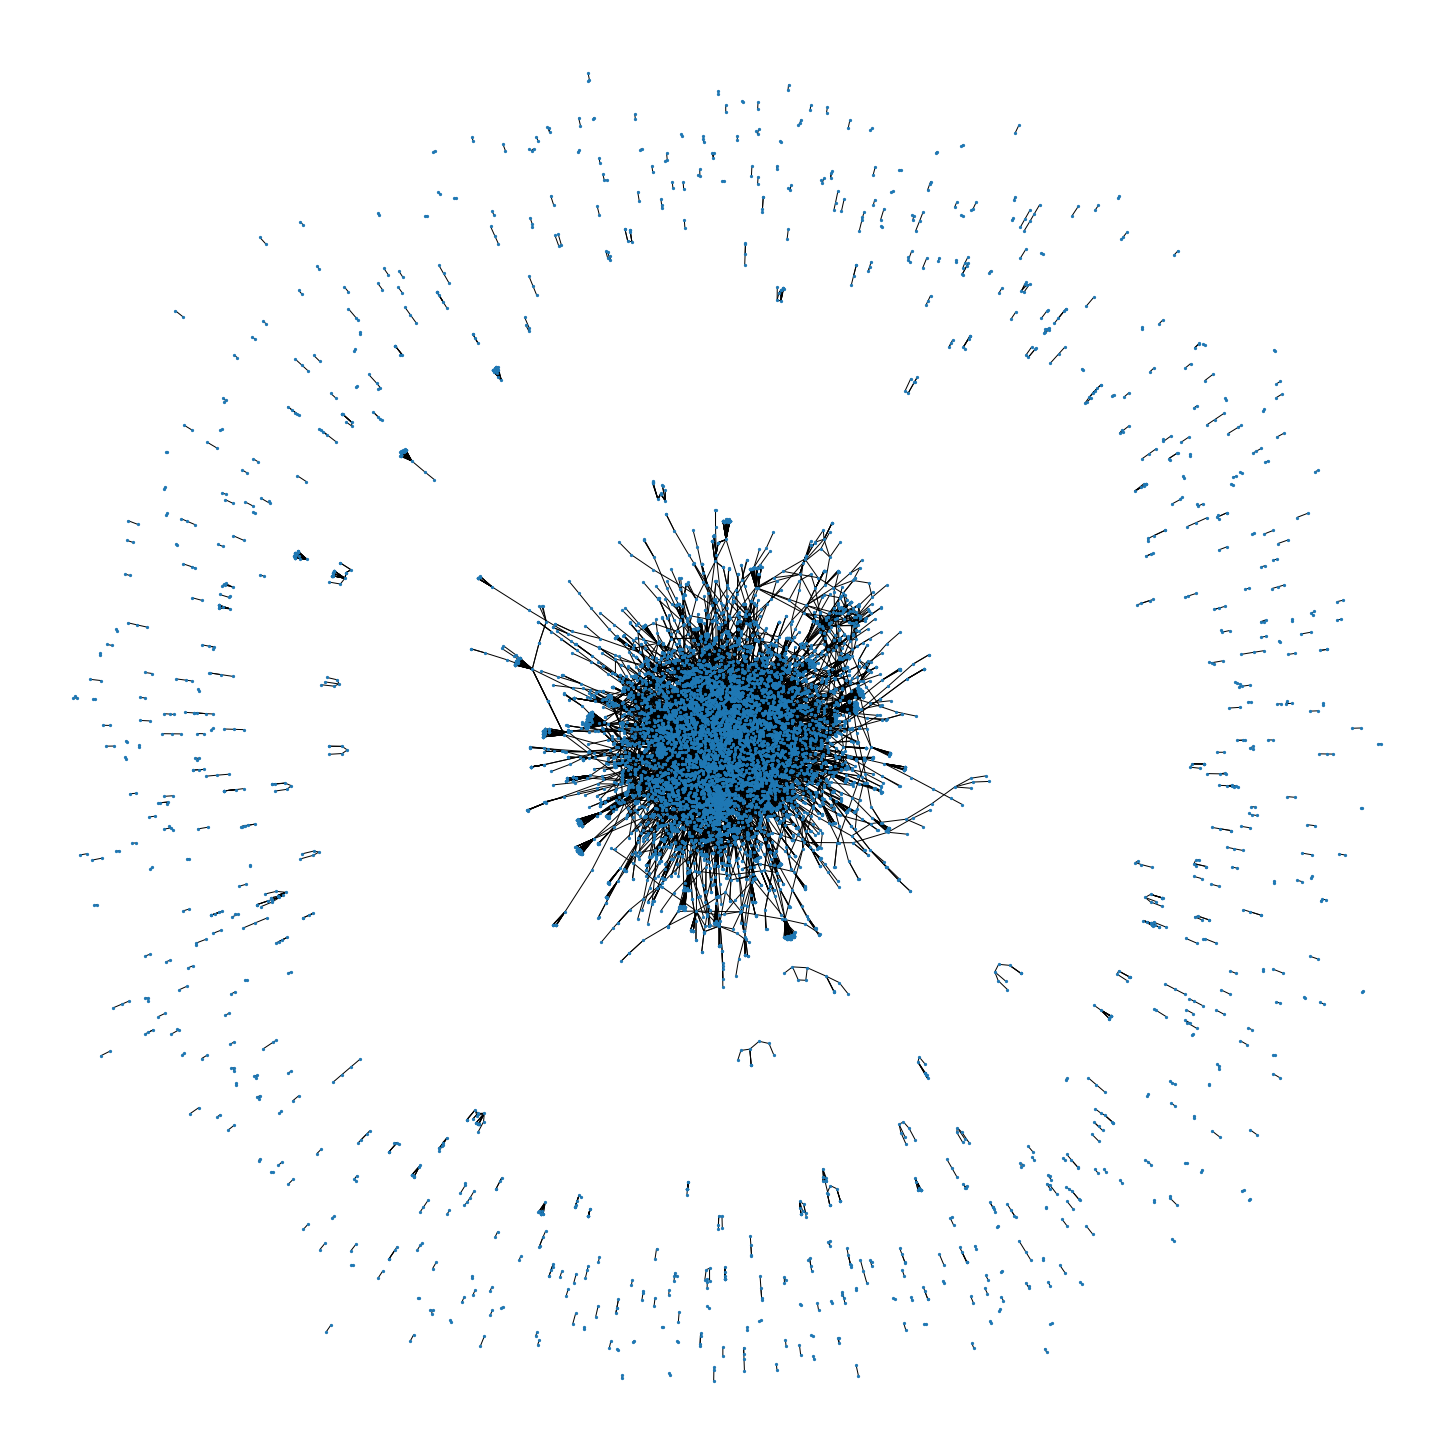

In [8]:
plt.figure(figsize = (20, 20))
nx.draw_spring(drug_target_interactions_graph, node_size = 5)

In [22]:
list(nx.connected_components(drug_target_interactions_graph))

[{'DB03766',
  'BE0003060',
  'DB07008',
  'DB00454',
  'BE0000813',
  'DB05092',
  'BE0003921',
  'DB07003',
  'BE0003286',
  'DB08204',
  'DB04294',
  'BE0003751',
  'DB11581',
  'DB03311',
  'DB00670',
  'DB07062',
  'BE0000626',
  'DB07967',
  'DB06788',
  'DB03535',
  'BE0003739',
  'BE0000945',
  'BE0000308',
  'DB08639',
  'DB02026',
  'BE0003321',
  'BE0004433',
  'DB04483',
  'BE0004426',
  'DB00399',
  'DB01085',
  'BE0003955',
  'DB00725',
  'DB03194',
  'DB04905',
  'DB09166',
  'DB04410',
  'BE0003737',
  'DB02108',
  'DB00610',
  'DB02796',
  'DB02053',
  'DB04657',
  'DB04606',
  'DB08426',
  'DB07220',
  'DB00149',
  'DB02623',
  'DB08284',
  'BE0001647',
  'DB00372',
  'DB05507',
  'DB02265',
  'DB13061',
  'DB05383',
  'DB02723',
  'DB00313',
  'BE0003064',
  'BE0004033',
  'DB07436',
  'DB01745',
  'DB02590',
  'DB07441',
  'BE0000195',
  'DB04405',
  'DB04108',
  'DB03361',
  'DB03832',
  'DB03512',
  'DB00495',
  'DB13164',
  'DB02068',
  'DB03467',
  'BE0003069',


<BarContainer object of 578 artists>

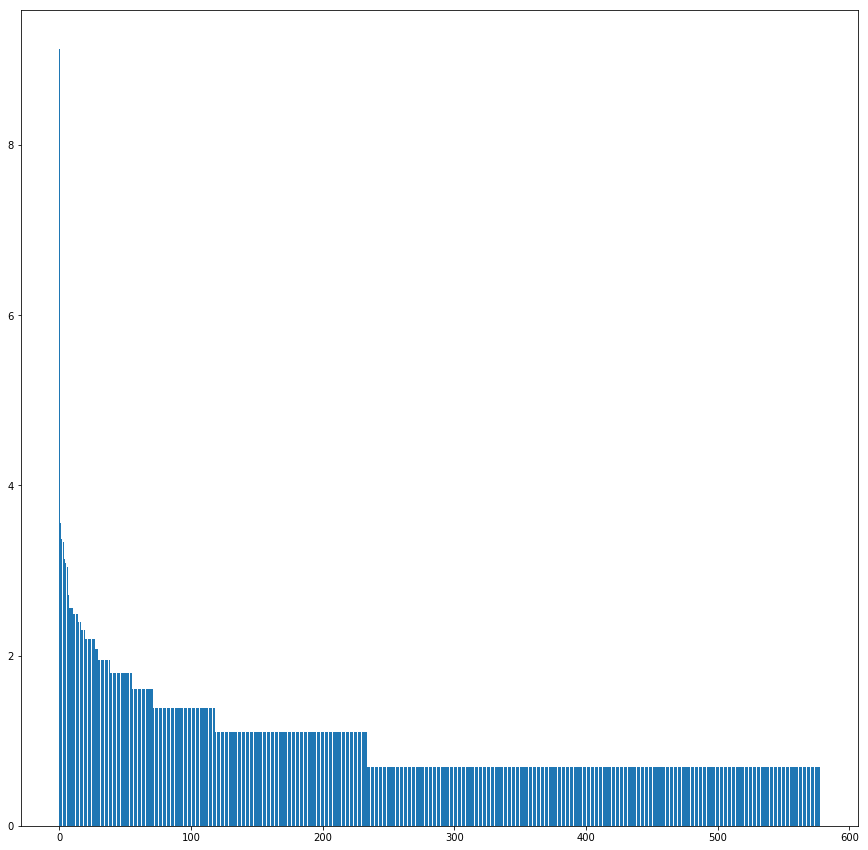

In [23]:
connect_components_list = [len(n) for n in nx.connected_components(drug_target_interactions_graph)]
plt.figure(figsize = (15, 15))
plt.bar(range(len(connect_components_list)), sorted(np.log(connect_components_list), reverse = True))

### Seems like there is one huge component and several smaller components. Taking a look at the largest component first

In [24]:
drug_target_interactions_major = list(nx.connected_component_subgraphs(drug_target_interactions_graph))[0]

In [50]:
len(drug_target_interactions_major)

9186

In [25]:
nx.is_connected(drug_target_interactions_major)

True

## Converting to NetworkX recommended bipartite format

In [26]:
bottom_nodes, top_nodes = bipartite.sets(drug_target_interactions_major)

In [27]:
[n for n in drug_target_interactions_major.nodes(data=True)]

[('DB03183', {}),
 ('DB00573', {}),
 ('BE0004811', {}),
 ('DB07771', {}),
 ('DB07315', {}),
 ('BE0000599', {}),
 ('BE0000427', {}),
 ('DB03766', {}),
 ('BE0003060', {}),
 ('DB07008', {}),
 ('DB05092', {}),
 ('BE0003286', {}),
 ('DB07003', {}),
 ('DB01718', {}),
 ('DB08204', {}),
 ('DB04294', {}),
 ('DB03626', {}),
 ('DB00055', {}),
 ('BE0003751', {}),
 ('BE0000114', {}),
 ('BE0004502', {}),
 ('BE0002028', {}),
 ('DB11581', {}),
 ('DB03311', {}),
 ('DB00670', {}),
 ('DB07062', {}),
 ('BE0001335', {}),
 ('BE0000626', {}),
 ('DB07967', {}),
 ('DB06788', {}),
 ('DB04545', {}),
 ('DB03535', {}),
 ('BE0000897', {}),
 ('DB07184', {}),
 ('BE0003212', {}),
 ('BE0003739', {}),
 ('DB05246', {}),
 ('BE0000945', {}),
 ('BE0000813', {}),
 ('DB08681', {}),
 ('DB03032', {}),
 ('BE0000308', {}),
 ('BE0004065', {}),
 ('DB08639', {}),
 ('DB02026', {}),
 ('BE0003321', {}),
 ('BE0001342', {}),
 ('DB07731', {}),
 ('DB04483', {}),
 ('DB07053', {}),
 ('BE0004426', {}),
 ('BE0003921', {}),
 ('DB00897', {}),
 (

In [28]:
drugs_df = drug_target_interactions[['drug_id', 'drug_name', 'drug_cas']].drop_duplicates().set_index('drug_id')
targets_df = drug_target_interactions[['target_id',
                                     'target_amino', 'target_gene',
                                     'target_name']].drop_duplicates().set_index('target_id')



In [29]:
drugs_df['bipartite'] = 0
targets_df['bipartite'] = 1

In [30]:
nodes = drugs_df.to_dict('index')
nodes.update(targets_df.to_dict('index'))

In [31]:
nx.set_node_attributes(drug_target_interactions_major, nodes)

In [32]:
[v for i,v in drug_target_interactions_major.nodes(data = True)]

[{'bipartite': 0,
  'drug_cas': nan,
  'drug_name': '1-(4-Aminophenyl)-3,5-Dimethyl-1h-Pyrazole-4-Carboxylic Acid Ethyl Ester'},
 {'bipartite': 0, 'drug_cas': '29679-58-1', 'drug_name': 'Fenoprofen'},
 {'bipartite': 1,
  'target_amino': nan,
  'target_gene': nan,
  'target_name': 'Magnesium cation'},
 {'bipartite': 0,
  'drug_cas': nan,
  'drug_name': '[(3,7,11-TRIMETHYL-DODECA-2,6,10-TRIENYLOXYCARBAMOYL)-METHYL]-PHOSPHONIC ACID'},
 {'bipartite': 0,
  'drug_cas': nan,
  'drug_name': '5-chloro-N-{4-[(1R)-1,2-dihydroxyethyl]phenyl}-1H-indole-2-carboxamide'},
 {'bipartite': 1,
  'target_amino': '>lcl|BSEQ0010417|ADP/ATP translocase 1\nMGDHAWSFLKDFLAGGVAAAVSKTAVAPIERVKLLLQVQHASKQISAEKQYKGIIDCVVR\nIPKEQGFLSFWRGNLANVIRYFPTQALNFAFKDKYKQLFLGGVDRHKQFWRYFAGNLASG\nGAAGATSLCFVYPLDFARTRLAADVGKGAAQREFHGLGDCIIKIFKSDGLRGLYQGFNVS\nVQGIIIYRAAYFGVYDTAKGMLPDPKNVHIFVSWMIAQSVTAVAGLVSYPFDTVRRRMMM\nQSGRKGADIMYTGTVDCWRKIAKDEGAKAFFKGAWSNVLRGMGGAFVLVLYDEIKKYV',
  'target_gene': '>lcl|BSEQ0010418|ADP/ATP transloc

In [33]:
top_nodes = {n for n, d in drug_target_interactions_major.nodes(data=True) if 'DB' in n}
bottom_nodes = {n for n, d in drug_target_interactions_major.nodes(data=True) if 'DB' not in n}

In [34]:
bottom_nodes

{'BE0003424',
 'BE0004811',
 'BE0000599',
 'BE0000427',
 'BE0004157',
 'BE0003060',
 'BE0000813',
 'BE0004942',
 'BE0000130',
 'BE0003286',
 'BE0003921',
 'BE0002536',
 'BE0000478',
 'BE0000501',
 'BE0003751',
 'BE0004502',
 'BE0001945',
 'BE0002717',
 'BE0001943',
 'BE0000626',
 'BE0004814',
 'BE0008625',
 'BE0004742',
 'BE0000897',
 'BE0000471',
 'BE0002328',
 'BE0002987',
 'BE0003739',
 'BE0003970',
 'BE0000945',
 'BE0004230',
 'BE0003834',
 'BE0002563',
 'BE0002475',
 'BE0000895',
 'BE0000308',
 'BE0003024',
 'BE0003321',
 'BE0001342',
 'BE0004433',
 'BE0004426',
 'BE0000963',
 'BE0002835',
 'BE0003164',
 'BE0002529',
 'BE0000086',
 'BE0001093',
 'BE0004665',
 'BE0003955',
 'BE0001976',
 'BE0004380',
 'BE0001400',
 'BE0001764',
 'BE0001108',
 'BE0001617',
 'BE0000152',
 'BE0000269',
 'BE0003634',
 'BE0004057',
 'BE0001768',
 'BE0001333',
 'BE0004084',
 'BE0004674',
 'BE0003737',
 'BE0000081',
 'BE0004440',
 'BE0002390',
 'BE0000644',
 'BE0000360',
 'BE0003845',
 'BE0002125',
 'BE00

## Investigating the structure of the two partite(?)

In [35]:
closeness_centrality_list = nx.bipartite.closeness_centrality(drug_target_interactions_major, top_nodes)
closeness_centrality_df = pd.DataFrame.from_dict(closeness_centrality_list, orient = 'index')

In [36]:
closeness_centrality_df = closeness_centrality_df.sort_values(0)
closeness_centrality_drugs = pd.merge(closeness_centrality_df, drugs_df, left_index = True, right_index = True, how = 'inner')
closeness_centrality_targets = pd.merge(closeness_centrality_df, targets_df, left_index = True, right_index = True, how = 'inner')

In [37]:
closeness_centrality_drugs = closeness_centrality_drugs.rename(columns = {0:'closeness_centrality'})
closeness_centrality_targets = closeness_centrality_targets.rename(columns = {0:'closeness_centrality'})

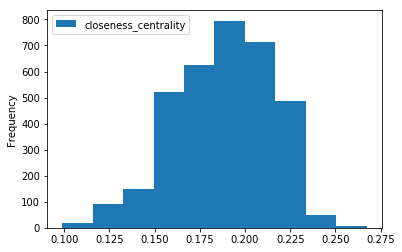

In [38]:
closeness_centrality_targets[['closeness_centrality']].plot.hist('closeness_centrality')

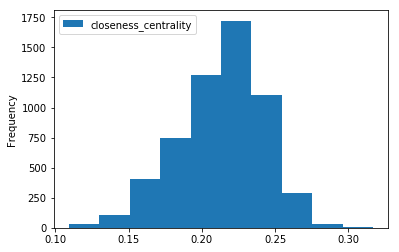

In [39]:
closeness_centrality_drugs[['closeness_centrality']].plot.hist('closeness_centrality')

#### Sanity Check: Drugs with lower rank are very esoteric and ones with high scores are common molecules

In [27]:
closeness_centrality_drugs

,closeness_centrality,drug_name,drug_cas,bipartite
DB05249,0.109102,FavId,NaN,0
DB13144,0.109102,Lenograstim,135968-09-1,0
DB08270,0.109188,N-(2-AMINOETHYL)-N~2~-{(1S)-1-[4'-(AMINOSULFON...,NaN,0
DB07563,0.109188,1-{7-cyclohexyl-6-[4-(4-methylpiperazin-1-yl)b...,NaN,0
DB06670,0.109188,Odanacatib,603139-19-1,0
...,...,...,...,...
DB02325,0.303822,Isopropyl Alcohol,67-63-0,0
DB08231,0.305740,MYRISTIC ACID,NaN,0
DB04272,0.309908,Citric Acid,77-92-9,0
DB00157,0.314907,NADH,58-68-4,0


In [21]:
## Serialized Implementation

v = []
u = []
path_delta = []

for edge in tqdm(drug_target_interactions_major.edges()):
    
    drug_target_interactions_major_temp = drug_target_interactions_major.copy()
    drug_target_interactions_major_temp.remove_edge(*edge)
    
    try:
        path_delta.append(nx.shortest_path(drug_target_interactions_major_temp, edge[0], edge[1]))
    except nx.NetworkXNoPath:
        path_delta.append(0)
    
    v.append(edge[0])
    u.append(edge[1])
    
    break

In [40]:
## Parallel implementation

def get_shortest_path_delta(args):
    
    drug_target_interactions_major = args[0]
    edge = args[1]
    
    drug_target_interactions_major_temp = drug_target_interactions_major.copy()
    drug_target_interactions_major_temp.remove_edge(*edge)
    
    try:
        return [nx.shortest_path(drug_target_interactions_major_temp,
                                edge[0], edge[1]), edge[0], edge[1]]
    except nx.NetworkXNoPath:
        return [[0],edge[0], edge[1]]

    
p = Pool(11)
shortest_path_delta = p.map(get_shortest_path_delta,
                            [[drug_target_interactions_major, e] for e in drug_target_interactions_major.edges()])

Process ForkPoolWorker-15:
Process ForkPoolWorker-13:
Process ForkPoolWorker-12:
Process ForkPoolWorker-14:
Process ForkPoolWorker-17:
Process ForkPoolWorker-22:
Process ForkPoolWorker-18:
Process ForkPoolWorker-20:
Process ForkPoolWorker-19:
Process ForkPoolWorker-16:
Process ForkPoolWorker-21:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/lib/python3.5/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/usr/lib/python3.5/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/usr/lib/python3.5/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/usr/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.5/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
Traceback (most recent call last):
  File "/usr/lib/python3.5/mul

In [83]:
shortest_path_delta

[[[0], 'DB03183', 'BE0001287'],
 [['DB00573', 'BE0000017', 'DB09213', 'BE0000262'], 'DB00573', 'BE0000262'],
 [['DB00573', 'BE0000262', 'DB02709', 'BE0000017'], 'DB00573', 'BE0000017'],
 [[0], 'BE0004811', 'DB01422'],
 [['DB07771', 'BE0002372', 'DB07780', 'BE0002373'], 'DB07771', 'BE0002373'],
 [['DB07771', 'BE0002373', 'DB07895', 'BE0002372'], 'DB07771', 'BE0002372'],
 [['DB07771', 'BE0002373', 'DB07780', 'BE0004071'], 'DB07771', 'BE0004071'],
 [[0], 'DB07315', 'BE0000007'],
 [[0], 'BE0000599', 'DB02426'],
 [[0], 'BE0000599', 'DB04178'],
 [['BE0000599',
   'DB00171',
   'BE0000703',
   'DB00845',
   'BE0004796',
   'DB00242',
   'BE0002450',
   'DB05260',
   'BE0004801',
   'DB00720'],
  'BE0000599',
  'DB00720'],
 [[0], 'BE0000599', 'DB01736'],
 [[0], 'BE0000599', 'DB03429'],
 [['BE0000599',
   'DB00720',
   'BE0004801',
   'DB05260',
   'BE0002450',
   'DB00242',
   'BE0004796',
   'DB00845',
   'BE0000703',
   'DB00171'],
  'BE0000599',
  'DB00171'],
 [[0], 'BE0000427', 'DB00157'],

In [42]:
shortest_path_delta_df = pd.DataFrame(columns = ['path', 'node_1', 'node_2', 'path_len'])
shortest_path_delta_df['path'] = [p[0] for p in shortest_path_delta]
shortest_path_delta_df['node_1'] = [p[1] for p in shortest_path_delta]
shortest_path_delta_df['node_2'] = [p[2] for p in shortest_path_delta]
shortest_path_delta_df['path_len'] = [len(p[0])-1 for p in shortest_path_delta]

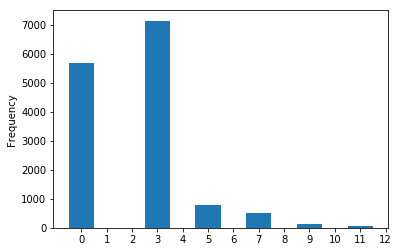

In [43]:
shortest_path_delta_df['path_len'].plot.hist(bins = np.arange(max(shortest_path_delta_df['path_len']))-0.5,
                                             xticks = range(max(shortest_path_delta_df['path_len'])))

In [65]:
max(shortest_path_delta_df['path_len'])

13

In [14]:
shortest_path_delta_df

NameError: name 'shortest_path_delta_df' is not defined

## Wrong: Extract the pairs beyond the threshold 4

In [44]:
thresholds = [12, 10, 8, 6, 4]

for threshold in thresholds:
    shortest_path_delta_df.loc[shortest_path_delta_df['path_len'] >= threshold].to_csv('negative_samples/negative_samples_thrsh:' +
                                                                                    str(threshold))
    

In [37]:
thresholds = [12, 10, 8, 6, 4]

for threshold in thresholds:
    print(shortest_path_delta_df.loc[shortest_path_delta_df['path_len'] >= threshold])

                                                    path     node_1  \
227    [BE0001274, DB03801, BE0001258, DB01673, BE000...  BE0001274   
229    [BE0001274, DB02122, BE0004139, DB09060, BE000...  BE0001274   
1530   [DB00171, BE0000014, DB08901, BE0003379, DB004...    DB00171   
1772   [BE0001153, DB02813, BE0001584, DB04404, BE000...  BE0001153   
1773   [BE0001153, DB03861, BE0003196, DB01110, BE000...  BE0001153   
...                                                  ...        ...   
11293  [BE0000896, DB01143, BE0000457, DB00811, BE000...  BE0000896   
12078  [BE0001904, DB02968, BE0001655, DB03530, BE000...  BE0001904   
12556  [BE0002377, DB03352, BE0001321, DB04456, BE000...  BE0002377   
13528  [DB00417, BE0001018, DB00415, BE0003379, DB089...    DB00417   
13987  [BE0004112, DB02494, BE0003753, DB07506, BE000...  BE0004112   

          node_2  path_len  
227      DB02122        12  
229      DB03801        12  
1530   BE0001069        12  
1772     DB03861        12  
17

### All Pairs Shortest Path Comparision

In [28]:
all_pairs_shortest_major = nx.floyd_warshall_numpy(drug_target_interactions_major)

In [32]:
with open ('supplimentary_data/all_pairs_shortest_path_connected_component.pkl', 'wb') as f:
    pkl.dump(all_pairs_shortest_major, f)

In [124]:
with open ('supplimentary_data/all_pairs_shortest_path_connected_component.pkl', 'rb') as f:
    all_pairs_shortest_major = pkl.load(f)

In [125]:
all_pairs_shortest_major.shape

(9186, 9186)

In [126]:
all_pairs_shortest_major_df = pd.DataFrame(all_pairs_shortest_major)
all_pairs_shortest_major_df = all_pairs_shortest_major_df.stack().reset_index()

In [127]:
all_pairs_shortest_major_df

,level_0,level_1,0
0,0,0,0.0
1,0,1,9.0
2,0,2,9.0
3,0,3,8.0
4,0,4,2.0
...,...,...,...
84382591,9185,9181,13.0
84382592,9185,9182,9.0
84382593,9185,9183,14.0
84382594,9185,9184,13.0


In [128]:
all_pairs_shortest_major_df_dedup = pd.DataFrame(np.sort(all_pairs_shortest_major_df[['level_0', 'level_1']].values, axis=1),
                                           columns = all_pairs_shortest_major_df[['level_0', 'level_1']].columns).drop_duplicates()

In [130]:
all_pairs_shortest_major_df_dedup

,level_0,level_1
0,0,0
1,0,1
2,0,2
3,0,3
4,0,4
...,...,...
84364222,9183,9184
84364223,9183,9185
84373408,9184,9184
84373409,9184,9185


In [131]:
all_pairs_shortest_major_df_dedup = pd.merge(all_pairs_shortest_major_df,
                                             all_pairs_shortest_major_df_dedup,
                                             on = ['level_0', 'level_1'], how = 'right')

In [133]:
all_pairs_shortest_major_df = all_pairs_shortest_major_df_dedup

## Correct: Extract the pairs beyond the threshold 6

### Extracting edges only from the largest connected component

1. Create dataframe of edges.
2. Right join with original dataframe (get only the edges from largest component)
3. Join with the shortest path dataframe
4. Filter out the ones above threshold

## Steps 1 & 2:

In [56]:
#Step 1
drug_target_interactions_major_edges = [[e[0],e[1]] for e in drug_target_interactions_major.edges]

In [58]:
drug_target_interactions_major_df = pd.DataFrame(drug_target_interactions_major_edges)

In [60]:
drug_target_interactions_major_df['edge'] = drug_target_interactions_major_df[0] + '-' + drug_target_interactions_major_df[1]

In [61]:
drug_target_interactions_major_df

,0,1,edge
0,DB03183,BE0001287,DB03183-BE0001287
1,DB00573,BE0000262,DB00573-BE0000262
2,DB00573,BE0000017,DB00573-BE0000017
3,BE0004811,DB01422,BE0004811-DB01422
4,DB07771,BE0002373,DB07771-BE0002373
...,...,...,...
14347,DB04147,BE0004175,DB04147-BE0004175
14348,DB00709,BE0004796,DB00709-BE0004796
14349,BE0004829,DB00626,BE0004829-DB00626
14350,DB00779,BE0004796,DB00779-BE0004796


In [63]:
drug_target_interactions['edge'] = drug_target_interactions['drug_id'] + '-' + drug_target_interactions['target_id']

In [68]:
len(drug_target_interactions)

15709

In [74]:
#Step 2
drug_target_interactions_major_df = pd.merge(drug_target_interactions, drug_target_interactions_major_df, on = 'edge', how = 'right')

### Steps 3 & 4:

In [135]:
all_pairs_shortest_major_df = all_pairs_shortest_major_df.rename(columns = {'level_0' : 'n0', 'level_1': 'n1', 0: 'shortest_path'})

In [136]:
all_pairs_shortest_major_df['shortest_path_hist'] = all_pairs_shortest_major_df['shortest_path'] / 2

In [137]:
all_pairs_shortest_major_df['shortest_path_hist']

0           0.0
1           4.5
2           4.5
3           4.0
4           1.0
           ... 
42195886    6.5
42195887    7.0
42195888    0.0
42195889    6.5
42195890    0.0
Name: shortest_path_hist, Length: 42195891, dtype: float64

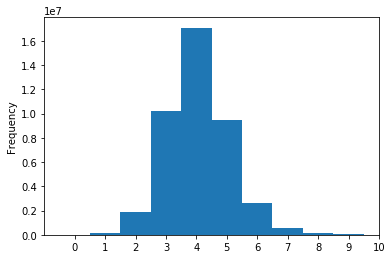

In [138]:
all_pairs_shortest_major_df['shortest_path_hist'].plot.hist(bins = np.arange(max(all_pairs_shortest_major_df['shortest_path_hist']))-0.5,
                                                     xticks = range(11))

In [84]:
max(all_pairs_shortest_major_df['shortest_path_hist'])

11.0

In [75]:
all_pairs_shortest_major_df.head()

,n0,n1,shortest_path,shortest_path_hist
0,0,0,0.0,0.0
1,0,1,9.0,4.5
2,0,2,9.0,4.5
3,0,3,8.0,4.0
4,0,4,2.0,1.0


In [87]:
from multiprocessing import  Pool
from functools import partial
import numpy as np
from tqdm._tqdm_notebook import tqdm_notebook
from sklearn import preprocessing
#tqdm_notebook.pandas()

def parallelize(data, func, num_of_processes=11):
    data_split = np.array_split(data, num_of_processes)
    pool = Pool(num_of_processes)
    data = pd.concat(pool.map(func, data_split))
    pool.close()
    pool.join()
    return data

def run_on_subset(func, data_subset):
    return data_subset.apply(func, axis=1)
    #return data_subset.progress_apply(func, axis=1)

def parallelize_on_rows(data, func, num_of_processes=11):
    return parallelize(data, partial(run_on_subset, func), num_of_processes)

#Instead of df.apply(some_func, axis=1)
#Use parallelize_on_rows(df, some_func)

In [91]:
drug_target_interactions_major_nodes = list(drug_target_interactions_major.nodes)

In [93]:
def map_nodeid_nodename(i, axis): return drug_target_interactions_major_nodes[i]

In [96]:
drug_target_interactions_major_nodes = list(drug_target_interactions_major.nodes)
#all_pairs_shortest_major_df['node_1'] = parallelize_on_rows(all_pairs_shortest_major_df['n1'], map_nodeid_nodename)
all_pairs_shortest_major_df['node_0'] = parallelize_on_rows(all_pairs_shortest_major_df['n0'], map_nodeid_nodename)

In [100]:
all_pairs_shortest_major_df['edge'] = all_pairs_shortest_major_df['node_0'] + '-' + all_pairs_shortest_major_df['node_1']

In [103]:
all_pairs_shortest_major_df = all_pairs_shortest_major_df.drop(['n0', 'n1', 'node_1', 'node_0'], axis = 1)

In [139]:
all_pairs_shortest_major_df

,n0,n1,shortest_path,shortest_path_hist
0,0,0,0.0,0.0
1,0,1,9.0,4.5
2,0,2,9.0,4.5
3,0,3,8.0,4.0
4,0,4,2.0,1.0
...,...,...,...,...
42195886,9183,9184,13.0,6.5
42195887,9183,9185,14.0,7.0
42195888,9184,9184,0.0,0.0
42195889,9184,9185,13.0,6.5


In [142]:
# Step 3:

thresholds = [6, 8, 12]

for threshold in thresholds:
    all_pairs_shortest_major_df.loc[all_pairs_shortest_major_df['shortest_path'] >= threshold].to_csv('negative_samples/negative_samples_thrsh:' +
                                                                                    str(threshold))
    